# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [19]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

data_path = Path('/Users/kevinjiang/bootcamp_Jianke_Jiang/project/data/processed/Trips_Tandon_EDA_20250823-191059.csv')

if data_path.exists():
    df = pd.read_csv(data_path, low_memory=False)
else:
    # Synthetic fallback: linear trend with noise and a few extremes
    print("else case")
print(df.head())


                  hour  depart_frequency  arrive_frequency  tot_frequency  \
0  2025-05-14 20:00:00                 1                 1              2   
1  2025-05-14 21:00:00                 1                 2              3   
2  2025-05-14 22:00:00                 5                 5             10   
3  2025-05-14 23:00:00                 2                 1              3   
4  2025-05-15 00:00:00                 0                 1              1   

   depart_ratio  arrive_ratio  short_dist  mid_dist  long_dist  outlier_iqr  \
0      0.500000      0.500000         0.0       2.0        0.0        False   
1      0.333333      0.666667         0.0       2.0        1.0        False   
2      0.500000      0.500000         2.0       5.0        3.0        False   
3      0.666667      0.333333         0.0       3.0        0.0        False   
4      0.000000      1.000000         0.0       1.0        0.0        False   

   outlier_z  win_freq  
0      False         1  
1      False

## 1) First look

In [8]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour              412 non-null    object 
 1   depart_frequency  412 non-null    int64  
 2   arrive_frequency  412 non-null    int64  
 3   tot_frequency     412 non-null    int64  
 4   depart_ratio      352 non-null    float64
 5   arrive_ratio      352 non-null    float64
 6   short_dist        412 non-null    float64
 7   mid_dist          412 non-null    float64
 8   long_dist         412 non-null    float64
 9   outlier_iqr       412 non-null    bool   
 10  outlier_z         412 non-null    bool   
 11  win_freq          412 non-null    int64  
dtypes: bool(2), float64(5), int64(4), object(1)
memory usage: 33.1+ KB


(None,
 hour                 0
 depart_frequency     0
 arrive_frequency     0
 tot_frequency        0
 depart_ratio        60
 arrive_ratio        60
 short_dist           0
 mid_dist             0
 long_dist            0
 outlier_iqr          0
 outlier_z            0
 win_freq             0
 dtype: int64)

## 2) Numeric profile

In [9]:
desc = df[['win_freq','depart_frequency','short_dist','mid_dist']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
win_freq,412.0,2.296117,2.309335,0.0,0.0,2.0,4.0,7.0,0.788064,-0.618669
depart_frequency,412.0,2.434466,2.670571,0.0,0.0,2.0,4.0,13.0,1.337159,1.572111
short_dist,412.0,0.594660,0.913947,0.0,0.0,0.0,1.0,4.0,1.576043,2.027614
mid_dist,412.0,5.652913,5.185927,0.0,1.0,4.0,9.0,24.0,0.816834,-0.022334


## 3) Distributions (TODO: add at least 3)

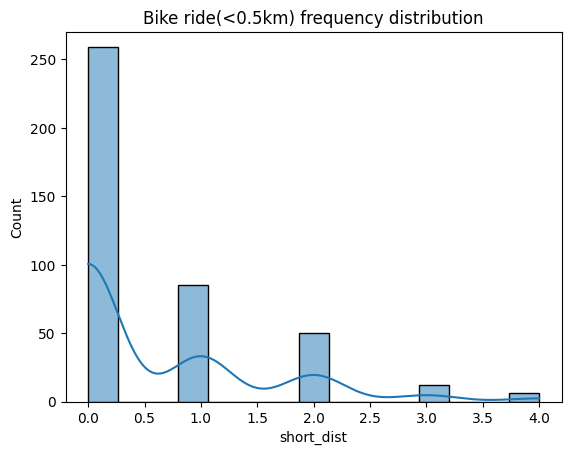

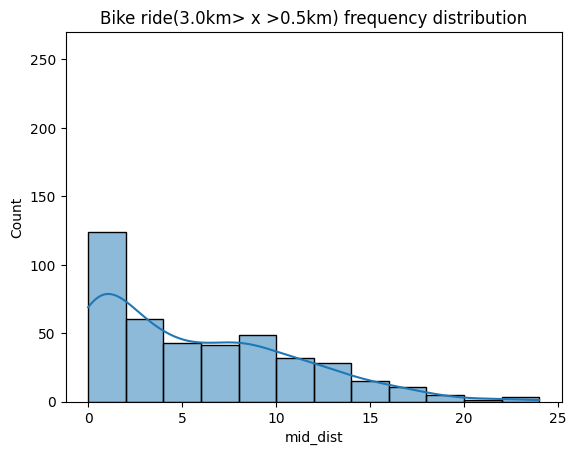

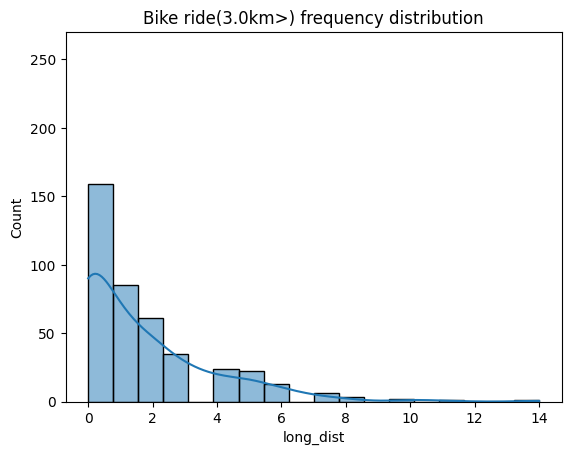

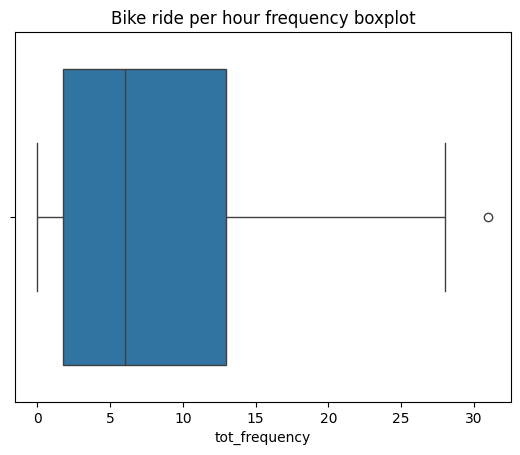

In [32]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['short_dist'], kde=True)
plt.title('Bike ride(<0.5km) frequency distribution')
plt.ylim(0, 270) 
plt.show()

# TODO: histogram + KDE for a key variable
sns.histplot(df['mid_dist'], kde=True)
plt.title('Bike ride(3.0km> x >0.5km) frequency distribution')
plt.ylim(0, 270) 
plt.show()

# TODO: histogram + KDE for a key variable
sns.histplot(df['long_dist'], kde=True)
plt.title('Bike ride(3.0km>) frequency distribution')
plt.ylim(0, 270) 
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['tot_frequency'])
plt.title('Bike ride per hour frequency boxplot')
plt.show()

## 4) Relationships (TODO: add at least 2)

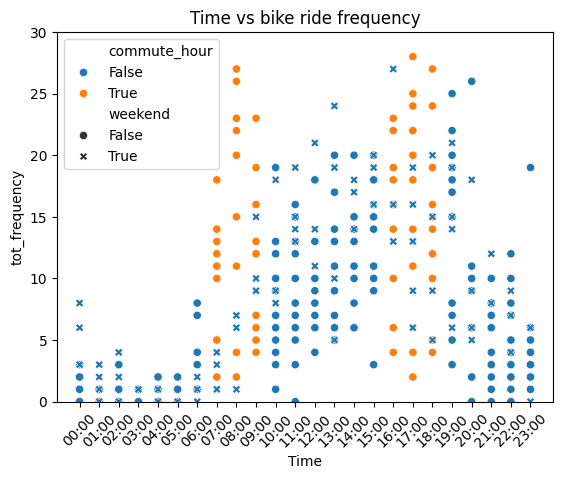

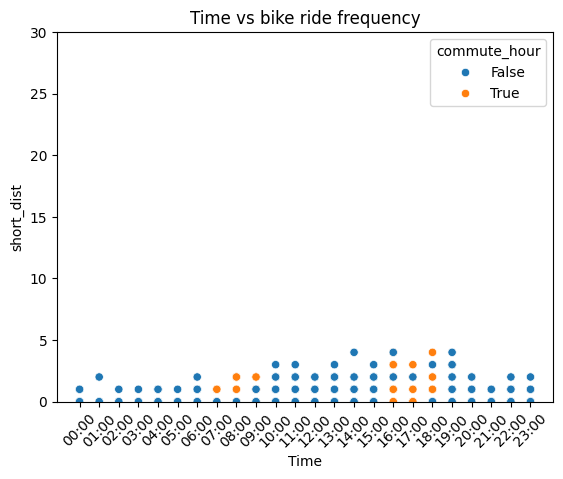

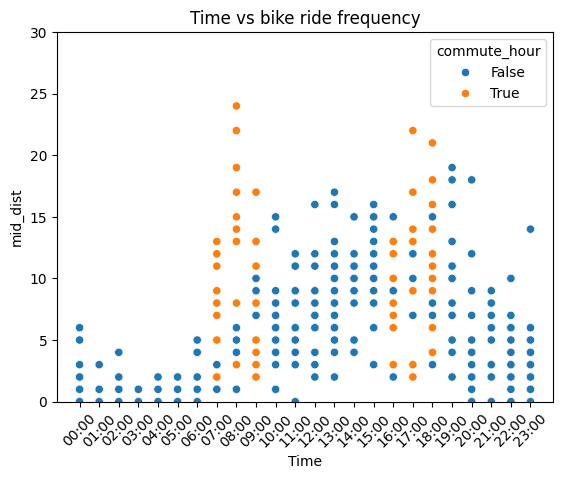

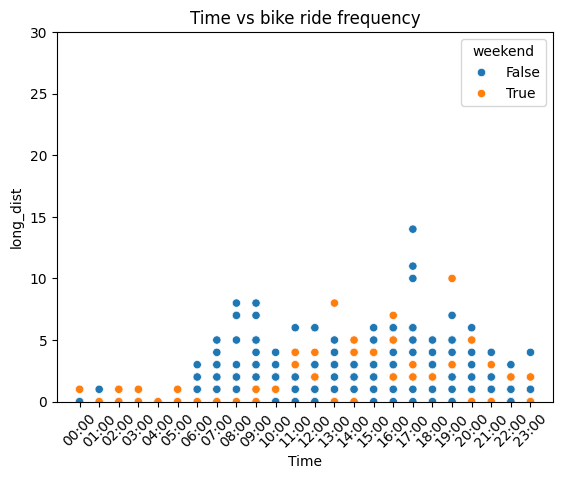

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pathlib
import datetime as dt 

# 1. 转换 hour 列为 datetime
df['hour'] = pd.to_datetime(df['hour'], errors='coerce')

# 2. 生成 Time 列（只保留小时和分钟）
df['Time'] = df['hour'].dt.strftime('%H:%M')  # 例如 '20:00'

# 如果你希望 X 轴顺序是 00:00 到 23:00，而不是按字符串排序：
df['Time'] = pd.Categorical(
    df['Time'],
    categories=[f"{h:02d}:00" for h in range(24)],
    ordered=True
)

df['commute_hour'] = (
    (df['hour'].dt.weekday < 5) &
    (df['hour'].dt.hour.between(7, 9) | df['hour'].dt.hour.between(16, 18))
)

# 0 = Monday, 6 = Sunday, so weekend is Saturday (5) or Sunday (6)
df['weekend'] = df['hour'].dt.weekday >= 5

# 3. Visualize the data
sns.scatterplot(data=df, x='Time', y='tot_frequency', hue = 'commute_hour', style = 'weekend')
plt.title('Time vs bike ride frequency')
plt.xticks(rotation=45)
plt.ylim(0, 30) 
plt.show()

sns.scatterplot(data=df, x='Time', y='short_dist', hue = 'commute_hour')
plt.title('Time vs bike ride frequency')
plt.xticks(rotation=45)
plt.ylim(0, 30) 
plt.show()

sns.scatterplot(data=df, x='Time', y='mid_dist', hue = 'commute_hour')
plt.title('Time vs bike ride frequency')
plt.xticks(rotation=45)
plt.ylim(0, 30) 
plt.show()

sns.scatterplot(data=df, x='Time', y='long_dist', hue = 'weekend')
plt.title('Time vs bike ride frequency')
plt.xticks(rotation=45)
plt.ylim(0, 30) 
plt.show()

def ts():
    return dt.datetime.now().strftime('%Y%m%d-%H%M%S')
PROC = pathlib.Path("..") / "data/processed"
PROC.mkdir(parents=True, exist_ok=True)
output_file = PROC / f"Trips_Tandon_EDA_{ts()}.csv"
df.to_csv(output_file, index=False)


## 5) (Optional) Correlation matrix

In [ ]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
1. Most of the demand for citi bike ride is short distance, the frequency decreases as the travel distance increase
2. During the commute hours, the medium distance travel increases
3. exclude the commute surge, the use of bike follow a pattern of rise from 5 a.m. and reach to the peak at 3 p.m. then decrease back 
- TODO: Assumptions & risks
- - Assumptions:
1. Distances between the stations for each order can represent the repative travel distance between each order (distance between station is straight line distance, but total travel distance is not).
2. External factors like weather, holidays, and special events are not accounted for at this stage.
3. Risks:
4. Missing or incorrect timestamps could misclassify trips into commute vs non-commute categories.
5. Outliers (extremely long or short rides) may skew distribution analysis if not handled.
6. Seasonal or day-of-week effects could bias insights if the dataset is not representative of the whole year.
- TODO: Next steps before modeling (cleaning & features)
	1.	Data Cleaning: Handle missing values and remove or adjust outliers (e.g., trips longer than a realistic threshold or 0 distance).
	2.	Feature Engineering: Incorporate external data if possible (e.g., weather, holidays) for richer modeling.